# Importing Modules

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
%matplotlib inline
from sklearn.linear_model import LinearRegression

## Defining Vasicek Module

In [4]:
def vasicek(r0, a, b, sigma, T, num_steps, num_paths):
    dt = T / num_steps
    rates = np.zeros((num_steps + 1, num_paths))
    rates[0] = r0
    
    for t in range(1, num_steps + 1):
        dW = np.random.normal(0, 1, num_paths)
        rates[t] = rates[t - 1] + a * (b - rates[t - 1]) * dt + sigma * np.sqrt(dt) * dW
    
    return rates

## Simulation Testing with simple example

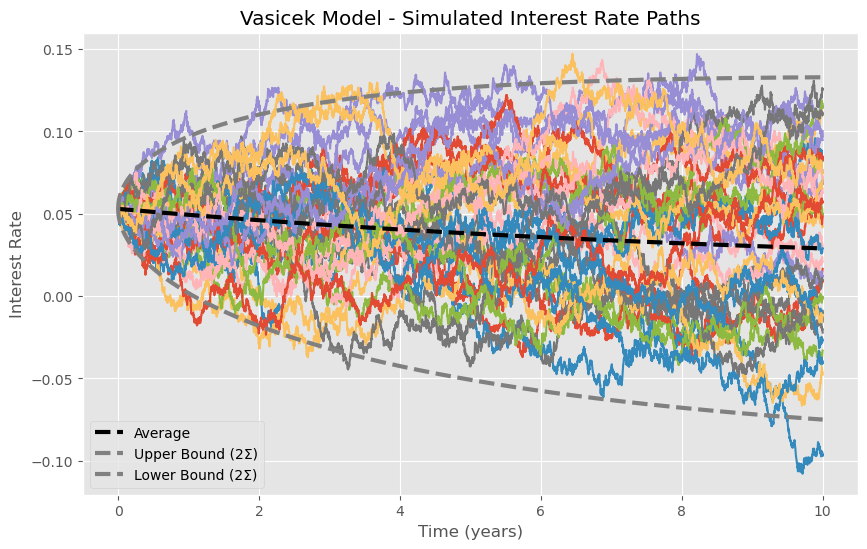

In [5]:
# Model parameters
r0 = 0.053  # Initial short rate
a = 0.1    # Mean reversion speed
b = 0.015  # Long-term mean
sigma = 0.025   # Volatility
T = 10      # Time horizon
num_steps = 5000  # Number of steps
num_paths = 40   # Number of paths

# Simulate Vasicek model
simulated_rates = vasicek(r0, a, b, sigma, T, num_steps, num_paths)

# Time axis
time_axis = np.linspace(0, T, num_steps + 1)

#average value
average_rates = [r0 * np.exp(-a * t) + b * (1 - np.exp(-a * t)) for t in time_axis]

# standard deviation
std_dev = [(sigma**2 / (2 * a) * (1 - np.exp(-2 * a * t)))**.5 for t in time_axis]

# Calculate upper and lower bounds (±2 sigma)
upper_bound = [average_rates[i] + 2 * std_dev[i] for i in range(len(time_axis))]
lower_bound = [average_rates[i] - 2 * std_dev[i] for i in range(len(time_axis))]

# Plotting multiple paths with time on x-axis
plt.figure(figsize=(10, 6))
plt.title('Vasicek Model - Simulated Interest Rate Paths')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
for i in range(num_paths):
    plt.plot(time_axis, simulated_rates[:, i])
    
plt.plot(time_axis, average_rates, color='black',linestyle='--', label ='Average', linewidth = 3)
plt.plot(time_axis, upper_bound, color='grey', linestyle='--', label='Upper Bound (2Σ)', linewidth = 3)
plt.plot(time_axis, lower_bound, color='grey', linestyle='--', label='Lower Bound (2Σ)', linewidth = 3)
plt.legend()
plt.show()